In [2]:
import os
import matplotlib.pyplot as plt
import random

base_dir = 'itout'

In [16]:
sets = {}
n = 0
for o in os.listdir(base_dir):
    i = 0
    ct_one = 0
    ct_two = 0
    ct_neither = 0
    percents = []
    for line in open(base_dir+'/'+o, 'r'):
        if i == 0:
            dataset = line.strip().split()[-1].split('/')[1]
            one = line.strip().split()[-1].split('/')[-1].split('.')[0]
        elif i == 1:
            two = line.strip().split()[-1].split('/')[-1].split('.')[0]
        elif i == 2:
            model = line.strip().split()[-1]
            title = model + ' ' + dataset + ' percent ' + one + ' versus ' + two
            sets[model] = sets.get(model, {})
            sets[model][title] = sets[model].get(title, (title, []))
            n += 1
        elif 'pair' in line:
            ct_one, ct_two, ct_neither = 0,0,0
        elif len(line.strip()) > 0:
            if 'sent1' in line:
                ct_one += 1
            elif 'sent2' in line:
                ct_two += 1
            else:
                ct_neither += 1
            p = ct_one / (ct_one + ct_two + ct_neither)
            percents = percents + [p]
        else:
            sets[model][title][1].append(percents)
            percents = []
        i += 1

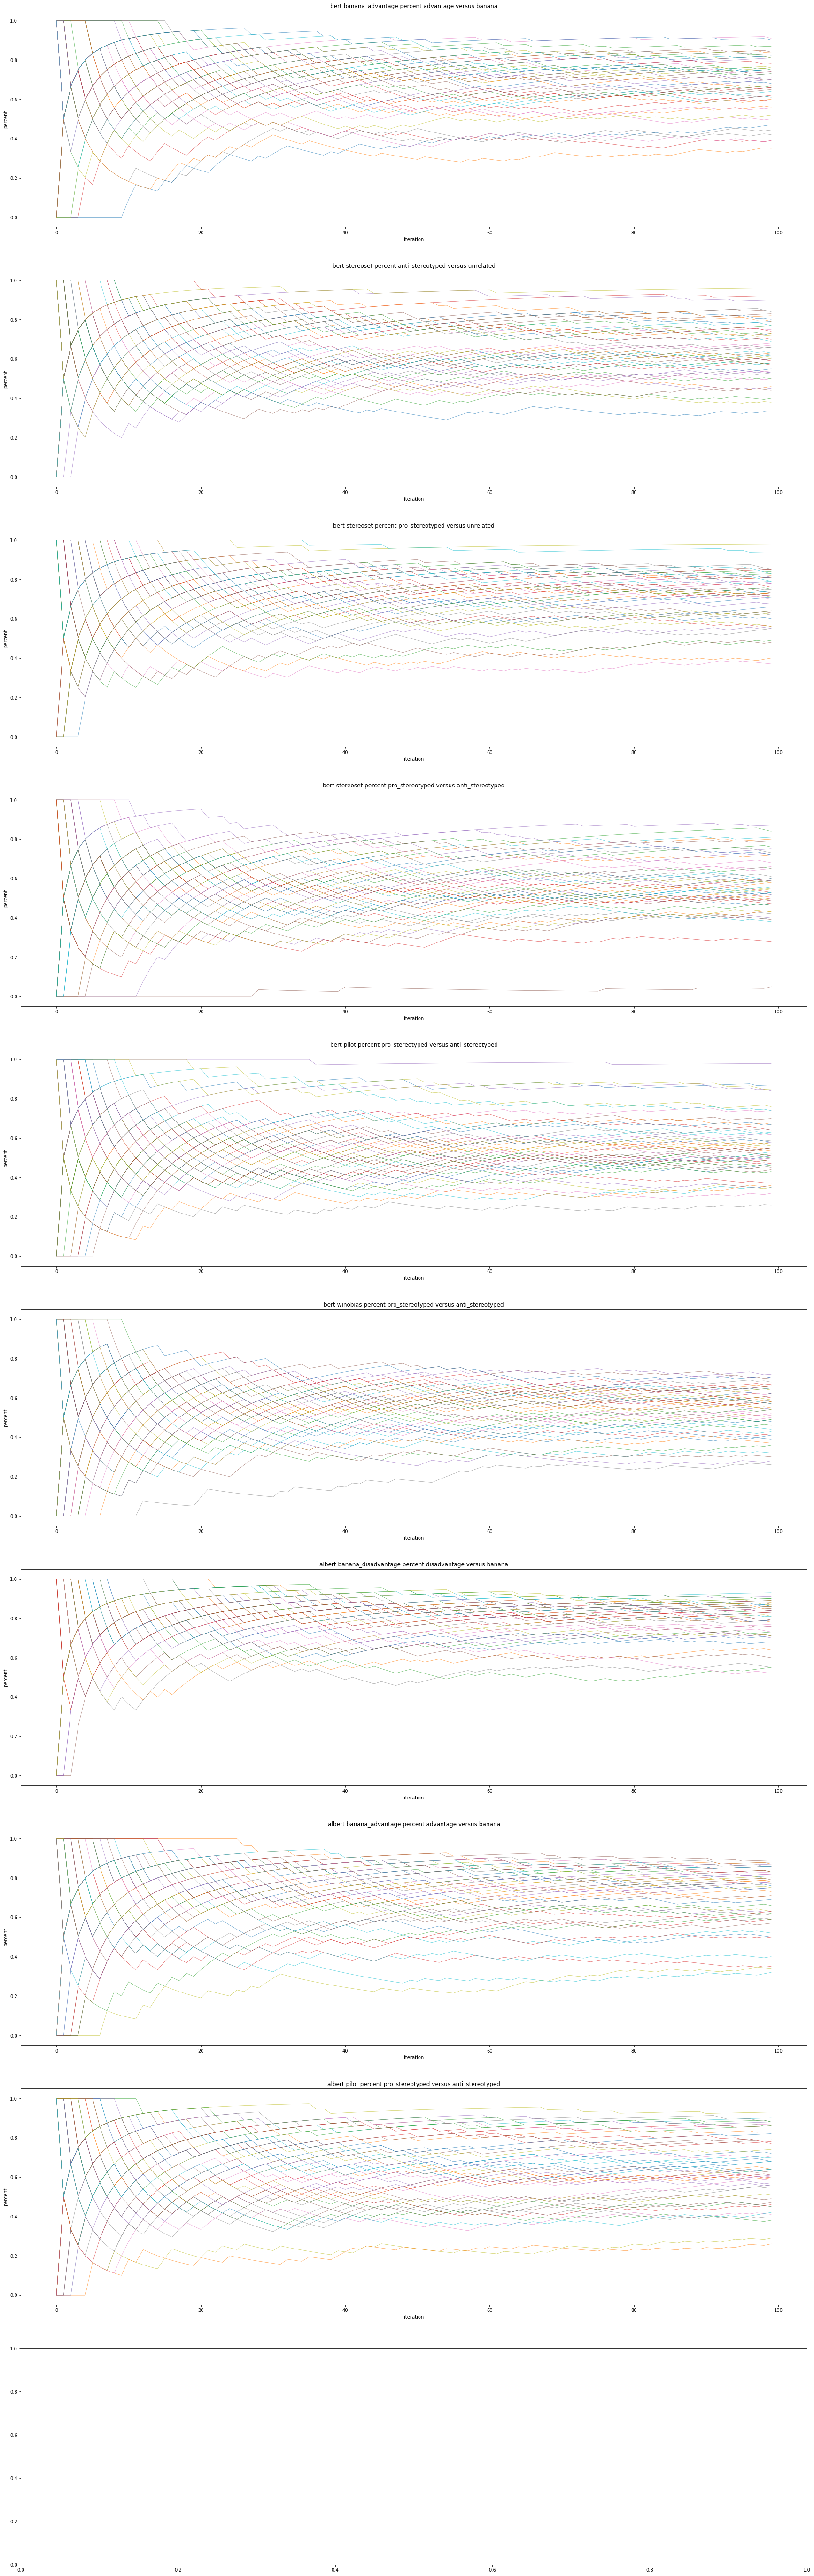

In [17]:
fig, axs = plt.subplots(n)
fig.set_figheight(n*10)
fig.set_figwidth(30)
i = 0
for model in sets:
    for dataset in sets[model]:
        title = sets[model][dataset][0]
        axs[i].set_title(title)
        axs[i].set_xlabel('iteration')
        axs[i].set_ylabel('percent')
        percents = sets[model][dataset][1]
        for sentence_pair in random.sample(percents, k=50):
            axs[i].plot(range(len(sentence_pair)), sentence_pair, marker='', linewidth=0.5)
        i += 1
            